In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# pip3 install Pillow
import os,sys
from PIL import Image
from keras.datasets import fashion_mnist

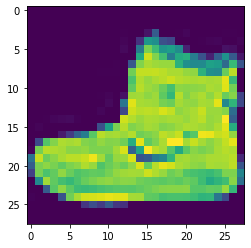

In [42]:
# Load Fashion MNIST dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Display first image
plt.imshow(trainX[0,:,:])
width, height = trainX[0,:,:].shape

In [43]:
# Take only a few samples of the shoe class
print(f'Num samples: {trainX.shape[0]}')
trainX = trainX[trainy == 9, :, :] 
print(f'Num samples: {trainX.shape[0]}')

Num samples: 60000
Num samples: 6000


In [44]:
# Only consider trainX, and compute input matrix X : n x d
X = trainX.reshape(trainX.shape[0], -1)

# Take only a few samples of the shoe class
X = X[:100,:]

print(X.shape)

(100, 784)


In [45]:
# Subtract the mean image from input matrix X
mX = np.mean(X, axis=0)
print(mX.shape)
X = X - mX # broadcasting

(784,)


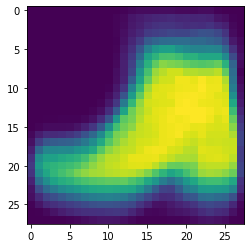

In [46]:
# reshape and visualize the mean image
mX_2d = np.reshape(mX, (height, width))
plt.imshow(mX_2d)

(784, 784)


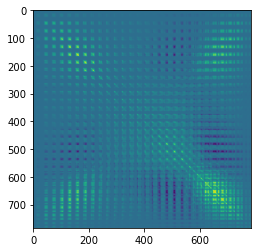

In [47]:
# compute covariance matrix: 1/n * X * X^T, if X is a d x n matrix
covariance = np.cov(X.T) # we transpose to get a d x n matrix required by np.cov
print(covariance.shape)
plt.imshow(covariance)

In [48]:
# Compute SVD of the covariance matrix
U, s, V = np.linalg.svd(covariance, full_matrices=True) # Sigma = U^T * diag(s) * V
U.shape, V.shape, s.shape

((784, 784), (784, 784), (784,))

In [49]:
U2, s2, V2 = np.linalg.svd(X, full_matrices=True) # X = U^T * diag(s) * V
U2.shape, V2.shape, s2.shape

((100, 100), (784, 784), (100,))

In [50]:
# Home Exercise : V2 and V are the same. Why ?
d = V - V2
np.linalg.norm(d)/(4080*4080)

2.377398364055634e-06

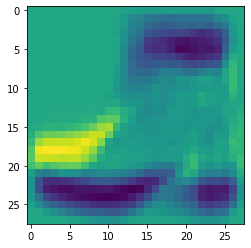

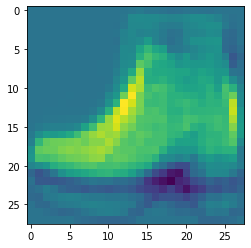

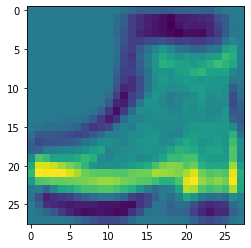

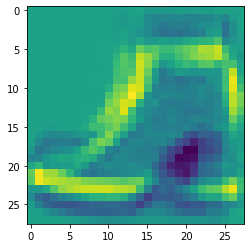

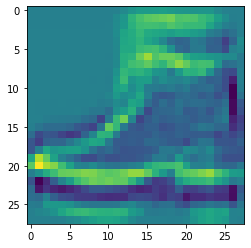

(140, 28)

In [51]:
# Extract first 5 eigenfaces which are represented by first 5 eigenvectors (columns of matrix U)
k =  5
list_eigenfaces = [np.reshape(U[:,i], (height, width)) for i in range(k)] # or np.array([0,1,2,3,4])
eigenfaces = np.reshape(np.asarray(list_eigenfaces), (k*height, width))
fig1 = plt.figure() # create a figure with the default size 
# plt.imshow(eigenfaces)
for i in range(k):
  plt.imshow(list_eigenfaces[i])
  plt.show()

fig1.savefig('eigenfaces.png', dpi = 1000)
eigenfaces.shape

In [52]:
# We build projection matrix U_k
U_k = np.array([U[:, i] for i in range(k)])
U_k.shape

(5, 784)

In [53]:
# Perform image compression with PCA keeping top K eigenvalues
Z = U_k.dot(X.T)
Z.shape

(5, 100)

In [54]:
# Image 10 has now been compressed from size 4000 to size k. 
Z[:,10]

array([ 905.65425787,  688.57180327,  -99.4696436 , -234.09227596,
        -41.33581173])

In [55]:
#Perform image decompression (don't forget to add back the original mean of the data)
X_bar = U_k.T.dot(Z).T  + mX
X_bar.shape

(100, 784)

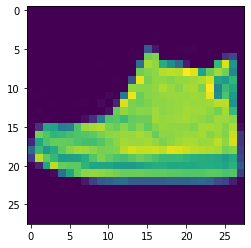

In [56]:
# We plot the original image to see how good is our decompression
img_idx = 10

first_img = np.reshape(X[img_idx,:] + mX, (height, width))
fig3 = plt.figure() # create a figure with the default size 
plt.imshow(first_img)

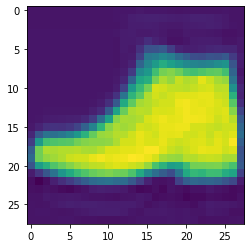

In [57]:
# Decompressed
first_img_decomp = np.reshape(X_bar[img_idx,:], (height, width))
fig2 = plt.figure() # create a figure with the default size 
plt.imshow(first_img_decomp)